# Unsupervised Machine Learning Algorithms

## Clustering

One example of a clustering algorithm that can be used for unsupervised learning is the k-means algorithm. In k-means clustering, the objective is to partition a given dataset into K non-overlapping clusters, where K is a predetermined value. Each data point is assigned to only one of the K clusters based on its similarity to the centroid, or center point, of the cluster. The centroids are iteratively updated until the cluster assignments stabilize, resulting in a final set of clusters. Unlike hierarchical clustering, k-means clustering does not create a hierarchical structure of nested clusters, and each data point is assigned to only one cluster. This makes k-means more suitable for datasets with a large number of data points and where non-overlapping clusters are desired. However, the performance of k-means clustering can be sensitive to the initial placement of the centroids, and it may not work well for datasets with irregular shapes or non-convex clusters. In summary, the k-means algorithm is a clustering algorithm used for unsupervised learning, which partitions a given dataset into K non-overlapping clusters. Each data point is assigned to only one cluster based on its similarity to the centroid of the cluster, and the centroids are updated iteratively until convergence. K-means is suitable for datasets with a large number of data points and non-overlapping clusters but may not work well for irregular or non-convex datasets.

Hierarchical clustering is a technique that can be performed in two different ways, namely, top-down and bottom-up clustering. Agglomerative algorithms are examples of bottom-up clustering algorithms. These algorithms start by considering each data point as an individual cluster and then combine smaller clusters progressively into larger ones. This results in a hierarchical structure of nested clusters where each cluster consists of subclusters with different levels of granularity. In contrast, divisive algorithms employ a top-down approach where the entire dataset is considered as one cluster initially. These algorithms then recursively partition the dataset into smaller and more homogeneous clusters until each data point is assigned to a separate cluster. Divisive clustering results in a binary tree structure where each node represents a partition of the data and each leaf node represents a single data point. Both agglomerative and divisive clustering have their advantages and disadvantages, and the choice of algorithm depends on the specific characteristics of the data and the objectives of the analysis. Agglomerative clustering is more efficient for large datasets with a high number of data points, whereas divisive clustering is better suited for datasets with a small number of data points or when the number of clusters is known a priori. In summary, hierarchical clustering can be performed using two different approaches, top-down and bottom-up clustering. Agglomerative algorithms are examples of bottom-up clustering, whereas divisive algorithms use a top-down approach. The choice of clustering algorithm depends on the specific requirements of the data analysis task. In contrast to k-means clustering, hierarchical clustering does not require a predetermined number of clusters as the number of clusters is not known beforehand and is determined based on the similarity or dissimilarity between data points.
There are several unsupervised machine learning algorithms available for clustering and dimensionality reduction, including K-Means, Mini Batch K-Means, Ward, and Mean Shift. These algorithms are typically implemented in a standardized way, involving data rescaling, instantiation of the estimator, model fitting, cluster assignment (if required), and algorithm assessment. K-Means clustering is a popular algorithm for unsupervised learning that has been extensively studied and used in various applications. Mini Batch K-Means is a variant of K-Means that is faster and more scalable, making it suitable for large datasets. Ward is a hierarchical clustering algorithm that can be used with or without connectivity constraints. Mean Shift is another clustering algorithm that iteratively moves a kernel to the local mode of the distribution, resulting in clusters that are of varying sizes and shapes. Affinity propagation is another unsupervised learning algorithm that creates clusters by sending messages between pairs of samples until convergence. The algorithm can be computed based on either the Spearman distance or the Euclidean distance, with the similarity measure computed as the opposite of the distance or equality. The preference value for all points can be computed as the median, minimum, or mean value of the similarity values. Affinity propagation is implemented by rescaling the data, computing the similarity and preference values, performing affinity propagation clustering, and assessing the algorithm's performance. Another example is DBSCAN is a density-based spatial clustering algorithm designed for applications with noise. It is an unsupervised clustering method that identifies core samples of high density and expands clusters from them. The algorithm partitions data into clusters by grouping together neighboring data points that satisfy a density criterion, while data points that do not belong to any cluster are considered noise.

Unlike other clustering algorithms, DBSCAN can identify clusters of arbitrary shapes that do not need to be convex-shaped. DBSCAN is a deterministic algorithm that produces the same clusters when given the same data in the same order. However, changes to the order of the data may result in different cluster formations. 


### K-Means

This Python code generates a scatter plot of a synthetic dataset using the Scikit-learn library. Overall, this code demonstrates how to perform K-means clustering on a synthetic dataset using Scikit-learn, and visualize the clusters using a scatter plot.

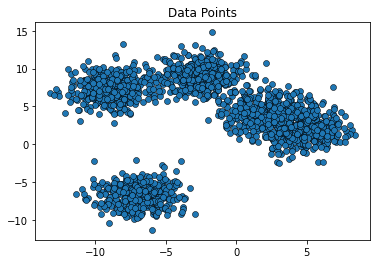

In [3]:
# Import the necessary modules
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
data = make_blobs(n_samples=2000, centers=5, cluster_std=1.5, random_state=42)

# Setting scatter plot title.
plt.title('Data points')

# Show the scatter plot.
plt.scatter(data[0][:,0], data[0][:,1], edgecolors='black', linewidths=.5);

plt.show()

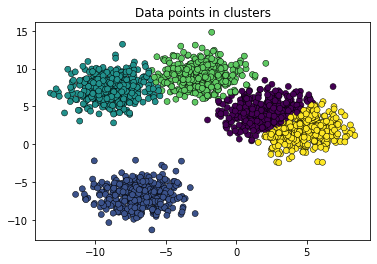

In [6]:
# Creating k-means algorithm and setting the number of clusters (K=5).
K_Means = KMeans(n_clusters=5)

# Training
K_Means.fit(data[0])

# Make predictions
clusters = K_Means.predict(data[0])

# Setting scatter plot title.
plt.title('Data points in clusters')

# Show scatter plot.
plt.scatter(data[0][:,0], data[0][:,1], c=clusters, edgecolors='black', linewidths=.5)

plt.show()

### Mini-batch K-means

Overall, this code performs Mini-batch K-means clustering on the "longitude" and "latitude" columns of the data DataFrame, assigns each data point to a cluster, and creates a scatter plot of the data points colored according to their cluster assignments. The resulting plot provides a visual representation of the clusters and can be used to gain insights into the data.

In [11]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import seaborn as sns

data = pd.read_csv("../data/datasets/housing.csv")
data = data.loc[:, ["median_income", "latitude", "longitude"]]
data.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


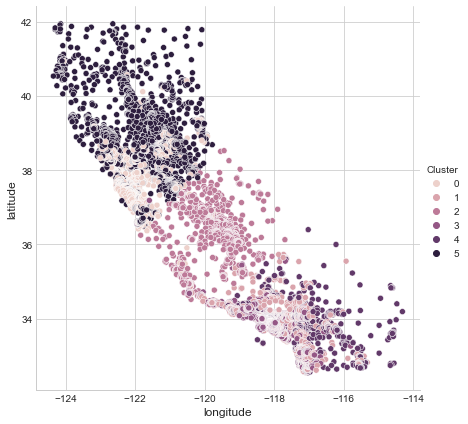

In [14]:
MiniBatch = MiniBatchKMeans(n_clusters=6, random_state=42, batch_size=6)
data["Cluster"] = MiniBatch.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("int")

plt.style.use('seaborn-colorblind')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelsize='large', titlesize=10, titlepad=10)
sns.relplot(x='longitude', y='latitude', hue='Cluster', data=data, height=6)
plt.show()


### Mean Shift

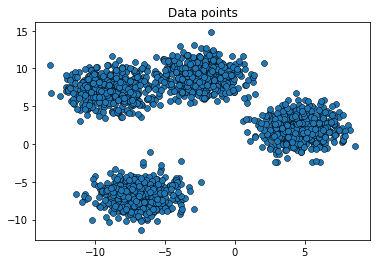

In [30]:
# Import the necessary modules
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
X,y = make_blobs(n_samples=2000, centers=4, cluster_std=1.5, random_state=42)

# Setting scatter plot title.
plt.title('Data points')

# Show the scatter plot.
plt.scatter(X[:,0], X[:,1], edgecolors='black', linewidths=.5)

plt.show()

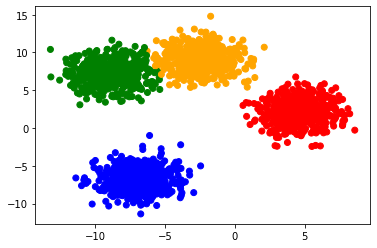

In [31]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate the bandwidth for Mean Shift algorithm
bandwidth = estimate_bandwidth(X, quantile=0.12, n_samples=25)

# Instantiate and fit the Mean Shift model using the estimated bandwidth
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)

# Retrieve the labels for each data point and find the unique labels
labels = meanshift.labels_
labels_unique = np.unique(labels)

# Calculate the number of clusters based on unique labels
n_clusters_ = len(labels_unique)

# Predict the cluster assignment for all data points
P = meanshift.predict(X)

# Define colors for each cluster label and generate a list of colors for the plot
colors = list(map(lambda x: 'red' if x == 1 else 'blue' if x == 2 else 'green' if x == 3 else 'orange', P))

# Create a scatter plot of the data points with colors based on their cluster assignments
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.show()

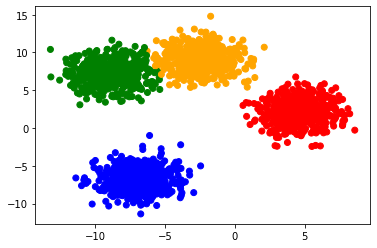